In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
import inspect
import collections

In [2]:
df = pd.read_csv("C:\\Users\\Fabian\\Desktop\\ML\\5\\dataCircle.txt", delim_whitespace=True);

#df['color'] = df.label.apply(lambda l: 'green' if l == 1 else 'red')
df['X'] = [np.array([x, y]) for (x, y) in zip(df.x1, df.x2)]

In [76]:
    def getErrors(funcList, D): 
        e = []
        for func in funcList:
            errors = np.array([y!=func.calc(x) for y,x in zip(labels,data)])
#             print(errors)
            e.append([(errors*D).sum(),func, func.t,func.dim])
        return e

In [115]:
    def set_rule(funcList, D, ALPHA,RULES):
        for func in funcList:
            errors = np.array([y!=func.calc(x) for y,x in zip(labels,data)])
            e = (errors*D).sum()
            alpha = 0.5 * np.log((1-e)/e)
#             print ('e=%.2f a=%.2f'%(e, alpha))
            w = np.zeros(m)
            for i in range(m):
                if errors[i] == 1: w[i] = D[i] * np.exp(alpha)
                else: w[i] = D[i] * np.exp(-alpha)
            D = w / w.sum()
            RULES.append(func)
            ALPHA.append(alpha)
        return ALPHA,RULES,D

In [70]:
    def evaluate(ALPHA ,RULES):
        NR = len(RULES)
        wrong =[]
        for (x,l) in zip(data,labels):
            hx = [ALPHA[i]*(RULES[i].calc(x)) for i in range(NR)]
            wrong.append(np.sign(l) == np.sign(sum(hx)))
        return wrong      

In [71]:
class wc_b:
    def __init__(self,t,dim):
        self.t = t
        self.dim = dim
        
    def calc(self,x):
        if x[self.dim] > self.t:
            return 1
        else: return -1
    
class wc_s:
    def __init__(self,t,dim):
        self.t = t
        self.dim = dim
        
    def calc(self,x):
        if x[self.dim] < self.t:
            return 1
        else: return -1

In [112]:
m = df.shape[0]
D = np.ones(m)/m
RULES = []
ALPHA = []
data = df.X
labels = df.label
winner =[]

In [118]:

t = -10
funcList_x_b,funcList_x_s,funcList_y_b,funcList_y_s  = [],[],[],[]

for i in range(200):
    funcList_x_b.append(wc_b(t,0))
    funcList_x_s.append(wc_s(t,0))
    funcList_y_b.append(wc_b(t,1))
    funcList_y_s.append(wc_s(t,1))
    t += 0.1
    
#print([i.t for i in funcList])    
    
x_b = sorted(getErrors(funcList_x_b, D), key = lambda x: x[0])
winner.append(x_b[0])
x_s = sorted(getErrors(funcList_x_s, D), key = lambda x: x[0])
winner.append(x_s[0])
y_b = sorted(getErrors(funcList_y_b, D), key = lambda x: x[0])
winner.append(y_b[0])
y_s = sorted(getErrors(funcList_y_s, D), key = lambda x: x[0])
winner.append(y_s[0])

print(winner)
for i in range(5):
    funcListWinners = [i[1] for i in winner]
    ALPHA,RULES,D = set_rule(funcListWinners, D, ALPHA,RULES)
    wrong = evaluate(ALPHA, RULES)
wrongCount = collections.Counter(wrong)
wrongCount[False]/len(wrong)

[[0.40196078431372556, <__main__.wc_b object at 0x00000258CEB1D5F8>, -5.800000000000015, 0], [0.38235294117647067, <__main__.wc_s object at 0x00000258CEBA0A90>, 4.6999999999999815, 0], [0.39215686274509803, <__main__.wc_b object at 0x00000258CD64A668>, 9.799999999999963, 1], [0.38235294117647062, <__main__.wc_s object at 0x00000258CEBA7780>, 2.199999999999982, 1], [0.42249900126449236, <__main__.wc_b object at 0x00000258CD64DDD8>, -3.2000000000000206, 0], [0.40310095339934648, <__main__.wc_s object at 0x00000258CD66B390>, 6.3999999999999755, 0], [0.25771619812184826, <__main__.wc_b object at 0x00000258CD64D128>, -4.700000000000019, 1], [0.36193743864880662, <__main__.wc_s object at 0x00000258CD66B4E0>, 6.499999999999975, 1], [0.38083129614385358, <__main__.wc_b object at 0x00000258CD675470>, 9.899999999999963, 0], [0.35582977230499668, <__main__.wc_s object at 0x00000258CEAB8208>, -10, 0], [0.35582977230499668, <__main__.wc_b object at 0x00000258CD675400>, 9.799999999999963, 1], [0.355

0.0

In [123]:
weakClass = [[i[2],i[3]] for i in winner]
weakClass

[[-5.800000000000015, 0],
 [4.6999999999999815, 0],
 [9.799999999999963, 1],
 [2.199999999999982, 1],
 [-3.2000000000000206, 0],
 [6.3999999999999755, 0],
 [-4.700000000000019, 1],
 [6.499999999999975, 1],
 [9.899999999999963, 0],
 [-10, 0],
 [9.799999999999963, 1],
 [-10, 1],
 [-6.800000000000011, 0],
 [-1.400000000000019, 0],
 [-6.2000000000000135, 1],
 [6.499999999999975, 1]]

In [130]:
ALPHA

[0.19865089873450151,
 0.25402717893480664,
 0.47519184536525694,
 0.31193531777208766,
 0.2595017721039975,
 0.20204882315394981,
 0.35768098468529758,
 0.046609866415253359,
 0.21429949590609881,
 0.142962412770332,
 0.24254451410797515,
 0.029735501560234009,
 0.14011797300919537,
 0.092448412419995463,
 0.16242052879589239,
 0.022571715338171389,
 0.092543373346593905,
 0.060650293562635862,
 0.10962237413406054,
 0.016629787076834213,
 0.062206332144933811,
 0.04054508071574963,
 0.074689778107807261,
 0.011994346612173858,
 0.14618426639952406,
 0.14735400453852548,
 0.45990468947405927,
 0.2136400359247613,
 -0.3758257113565654,
 -0.076450886903036711,
 0.23860904536703115,
 0.091877000687320715,
 0.15688601613569814,
 0.19766372101200827,
 0.19646818481112657,
 0.14399668172043653,
 -0.14111051447458511,
 -0.049539038657547635,
 0.31810965901299837,
 0.049652906305978885,
 0.11376222137567012,
 0.21808278684429189,
 0.12562591932155706,
 0.13016594369259829,
 -0.034423764419841

In [126]:
# plotError()

In [90]:
def plotError():
    df['classified'] = wrong
    fig, ax = plt.subplots(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k');
    ax.scatter(df.x1, df.x2, c= df.classified.apply(lambda l: 'red' if l == False else 'black'));
    ax.plot()
    ax.set_title('AdaBoost')
    plt.show()

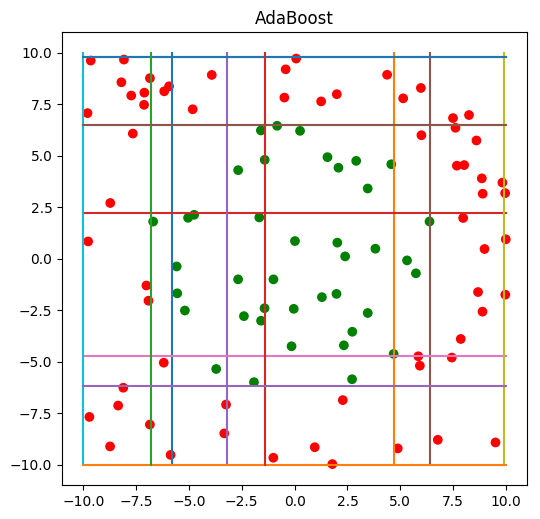

In [129]:
fig, ax = plt.subplots(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k');
ax.scatter(df.x1, df.x2, c= df.label.apply(lambda l: 'green' if l == 1 else 'red'));
for classifier in weakClass:
    if classifier[1] is 0:
        ax.plot([classifier[0],classifier[0]],[-10,10])
    else:
        ax.plot([-10,10],[classifier[0],classifier[0]])
ax.set_title('AdaBoost')
plt.show()

In [73]:
li = []
func = lambda x: x+y
for i in range(10):
    li.append(func)